In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Loading the data

In [ ]:
train_input_path = 'data/test.csv'
test_input_path = 'data/train.csv'

In [ ]:
train = pd.read_csv(train_input_path, index_col = 'Employee ID')
final_test = pd.read_csv(test_input_path, index_col = 'Employee ID')

## Data Analysis

In [ ]:
train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
print("\n",train['Gender'].value_counts())

print("\n",train['Company Type'].value_counts())

print("\n",train['WFH Setup Available'].value_counts())

print("\n",train['Designation'].value_counts().sort_index())

print("\n",train['Resource Allocation'].value_counts().sort_index())



 Female    11908
Male      10842
Name: Gender, dtype: int64

 Service    14833
Product     7917
Name: Company Type, dtype: int64

 Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

 0.0    1507
1.0    4881
2.0    7588
3.0    5985
4.0    2391
5.0     398
Name: Designation, dtype: int64

 1.0     1791
2.0     2075
3.0     3192
4.0     3893
5.0     3861
6.0     2943
7.0     1965
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64


In [ ]:
train.dtypes

Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

## Converting the datatypes of columns to a suitable type

In [ ]:
# date of joining -> datetype
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])
final_test['Date of Joining'] = pd.to_datetime(final_test['Date of Joining'])

# gender -> binary
gender = {'Female': 1,'Male': 0}
train['Gender'] = [gender[i] for i in train['Gender']]
final_test['Gender'] = [gender[i] for i in final_test['Gender']]

# company type -> binary
company_type = {'Service': 1,'Product': 0}
train['Company Type'] = [company_type[i] for i in train['Company Type']]
final_test['Company Type'] = [company_type[i] for i in final_test['Company Type']]

# WFH Setup Available -> binary 
wfh_setup_avail = {'No': 0,'Yes': 1}
train['WFH Setup Available'] = [wfh_setup_avail[i] for i in train['WFH Setup Available']]
final_test['WFH Setup Available'] = [wfh_setup_avail[i] for i in final_test['WFH Setup Available']]

# Designation -> int
train['Designation'] = train['Designation'].astype('Int64')
final_test['Designation'] = final_test['Designation'].astype('Int64')

# Resource Allocation -> int
train['Resource Allocation'] = train['Resource Allocation'].astype('Int64')
final_test['Resource Allocation'] = final_test['Resource Allocation'].astype('Int64')

train.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation              Int64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
train.isnull().sum() 

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
train = train.dropna()

In [ ]:
train.isnull().sum() 

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
train[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.877893,0.691823,0.736412
Resource Allocation,0.877893,1.000000,0.799563,0.855005
Mental Fatigue Score,0.691823,0.799563,1.000000,0.944389
Burn Rate,0.736412,0.855005,0.944389,1.000000


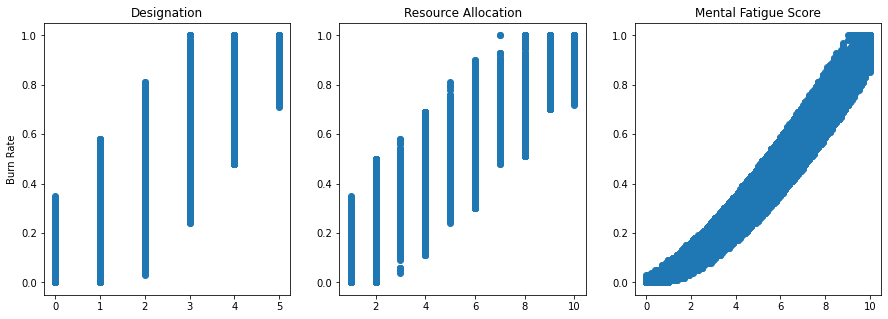

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(train['Designation'],train['Burn Rate'])
axs[0].set_title('Designation')
axs[0].set(ylabel='Burn Rate')
axs[1].scatter(train['Resource Allocation'],train['Burn Rate'])
axs[1].set_title('Resource Allocation')
axs[2].scatter(train['Mental Fatigue Score'],train['Burn Rate'])
axs[2].set_title('Mental Fatigue Score')
plt.show()

In [ ]:
train['Month of Joining'] = train['Date of Joining'].dt.month
final_test['Month of Joining'] = final_test['Date of Joining'].dt.month

train['Quarter of Joining'] = train['Date of Joining'].dt.quarter
final_test['Quarter of Joining'] = final_test['Date of Joining'].dt.quarter

from datetime import date, datetime

seasons = {'Summer':(datetime(2008,6,21), datetime(2008,9,22)),
           'Autumn':(datetime(2008,9,23), datetime(2008,12,20)),
           'Spring':(datetime(2008,3,21), datetime(2008,6,20))}

def get_season(row):
    date = row['Date of Joining']
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Winter'
    
train['Season of Joining'] = train.apply(lambda row: get_season(row), axis=1)
final_test['Season of Joining'] = final_test.apply(lambda row: get_season(row), axis=1)

In [ ]:
# forming dummies

quater_dummies_train = pd.get_dummies(train['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_train = pd.get_dummies(train['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_train = pd.get_dummies(train['Designation'], prefix='Designation', drop_first=False)

train = pd.concat([train, designation_dummies_train, quater_dummies_train, season_dummies_train], axis=1)


quater_dummies_final_test = pd.get_dummies(final_test['Quarter of Joining'], prefix='Quarter', drop_first=False)
season_dummies_final_test = pd.get_dummies(final_test['Season of Joining'], prefix='Season', drop_first=False)
designation_dummies_final_test = pd.get_dummies(final_test['Designation'], prefix='Designation', drop_first=False)

final_test = pd.concat([final_test, designation_dummies_final_test, quater_dummies_final_test, season_dummies_final_test], axis=1)

In [ ]:
train.dtypes

Date of Joining         datetime64[ns]
Gender                           int64
Company Type                     int64
WFH Setup Available              int64
Designation                      Int64
Resource Allocation              Int64
Mental Fatigue Score           float64
Burn Rate                      float64
Month of Joining                 int64
Quarter of Joining               int64
Season of Joining               object
Designation_0                    uint8
Designation_1                    uint8
Designation_2                    uint8
Designation_3                    uint8
Designation_4                    uint8
Designation_5                    uint8
Quarter_1                        uint8
Quarter_2                        uint8
Quarter_3                        uint8
Quarter_4                        uint8
Season_Autumn                    uint8
Season_Spring                    uint8
Season_Summer                    uint8
Season_Winter                    uint8
dtype: object

In [ ]:
X = train.drop(['Burn Rate','Date of Joining','Quarter of Joining','Season of Joining'], axis=1)
y = train['Burn Rate']

In [ ]:
X.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining',
       'Designation_0', 'Designation_1', 'Designation_2', 'Designation_3',
       'Designation_4', 'Designation_5', 'Quarter_1', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Season_Autumn', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

## Preprocessing

In [ ]:
poly = PolynomialFeatures(interaction_only=True)

X_t = pd.DataFrame(poly.fit_transform(X[['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining']]))

f_list = poly.get_feature_names(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Month of Joining'])

X_t.columns = f_list

X_t.head()

,1,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Month of Joining,Gender Company Type,Gender WFH Setup Available,Gender Designation,Gender Resource Allocation,Gender Mental Fatigue Score,Gender Month of Joining,Company Type WFH Setup Available,Company Type Designation,Company Type Resource Allocation,Company Type Mental Fatigue Score,Company Type Month of Joining,WFH Setup Available Designation,WFH Setup Available Resource Allocation,WFH Setup Available Mental Fatigue Score,WFH Setup Available Month of Joining,Designation Resource Allocation,Designation Mental Fatigue Score,Designation Month of Joining,Resource Allocation Mental Fatigue Score,Resource Allocation Month of Joining,Mental Fatigue Score Month of Joining
0,1.0,1.0,1.0,0.0,2.0,3.0,3.8,9.0,1.0,0.0,2.0,3.0,3.8,9.0,0.0,2.0,3.0,3.8,9.0,0.0,0.0,0.0,0.0,6.0,7.6,18.0,11.4,27.0,34.2
1,1.0,0.0,1.0,1.0,1.0,2.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,11.0,1.0,2.0,5.0,11.0,2.0,5.0,11.0,10.0,22.0,55.0
2,1.0,0.0,1.0,1.0,1.0,1.0,2.6,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.6,11.0,1.0,1.0,2.6,11.0,1.0,2.6,11.0,2.6,11.0,28.6
3,1.0,1.0,1.0,0.0,3.0,7.0,6.9,7.0,1.0,0.0,3.0,7.0,6.9,7.0,0.0,3.0,7.0,6.9,7.0,0.0,0.0,0.0,0.0,21.0,20.7,21.0,48.3,49.0,48.3
4,1.0,0.0,0.0,1.0,2.0,4.0,3.6,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,3.6,11.0,8.0,7.2,22.0,14.4,44.0,39.6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.25, random_state=42)

features = ['1',
 'Company Type',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Gender Company Type',
 'WFH Setup Available Mental Fatigue Score',
 'Designation Mental Fatigue Score',
 'Resource Allocation Mental Fatigue Score'
               ]

X_train_lrm = X_train[features]
X_test_lrm = X_test[features]

lrm = linear_model.LinearRegression()
lrm.fit(X_train_lrm, y_train)

y_predict_lrm = lrm.predict(X_test_lrm)
print(y_predict_lrm)
print(y_predict_lrm.shape)

print('Coefficients:')
for item in zip(list(X_train_lrm.columns), lrm.coef_):
    print(item)

print('\nTrain R-squared: ', lrm.score(X_train_lrm, y_train))
print('Test R-squared: ', lrm.score(X_test_lrm, y_test))

[0.25507313 0.39052756 0.35031123 ... 0.50561215 0.40675933 0.54537366]
(4648,)
Coefficients:
('1', 0.0)
('Company Type', 0.0035436550633633525)
('Resource Allocation', 0.008384272303283835)
('Mental Fatigue Score', 0.0661290287494567)
('Gender Company Type', -0.00531140272796386)
('WFH Setup Available Mental Fatigue Score', -0.0015810880376155613)
('Designation Mental Fatigue Score', -0.0005088776257576164)
('Resource Allocation Mental Fatigue Score', 0.0029293281554450693)

Train R-squared:  0.9242642849762224
Test R-squared:  0.9245093953450513
